In [7]:
!pip install pandas matplotlib nltk textblob streamlit


   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.9 MB 2.8 MB/s eta 0:00:04
   -- ------------------------------------- 0.5/9.9 MB 2.8 MB/s eta 0:00:04
   ---- ----------------------------------- 1.0/9.9 MB 1.7 MB/s eta 0:00:06
   ----- ---------------------------------- 1.3/9.9 MB 1.7 MB/s eta 0:00:06
   ----- ---------------------------------- 1.3/9.9 MB 1.7 MB/s eta 0:00:06
   ------ --------------------------------- 1.6/9.9 MB 1.3 MB/s eta 0:00:07
   ------ --------------------------------- 1.6/9.9 MB 1.3 MB/s eta 0:00:07
   ------- -------------------------------- 1.8/9.9 MB 1.0 MB/s eta 0:00:09
   ------- -------------------------------- 1.8/9.9 MB 1.0 MB/s eta 0:00:09
   ------- -------------------------------- 1.8/9.9 MB 1.0 MB/s eta 0:00:09
   -------- ------------------------------- 2.1/9.9 MB 862.7 kB/s eta 0:00:09
   -------- ------------


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\Student\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter
from textblob import TextBlob




In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Student\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Student\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
df=pd.read_csv(r"C:\Users\Student\Desktop\JoeBiden.csv")

In [5]:
df.head()

,content,created_at,date,likeCount,media,outlinks,quoteCount,quotedTweet,replyCount,retweetCount,retweetedTweet,url,id,conversationId
0,Representatives of the people took a vote on t...,Sat Dec 17 22:35:00 +0000 2022,2022-12-17 22:35:00+00:00,20269,NaN,[],329,NaN,6144,2245,NaN,https://twitter.com/JoeBiden/status/1604243794...,1604243794643255297,1604243794643255297
1,"Thanks to the Inflation Reduction Act, out-of-...",Sat Dec 17 19:28:00 +0000 2022,2022-12-17 19:28:00+00:00,12637,NaN,[],152,NaN,2960,1521,NaN,https://twitter.com/JoeBiden/status/1604196734...,1604196734728544261,1604196734728544261
2,When hospitals and community centers are threa...,Sat Dec 17 16:08:01 +0000 2022,2022-12-17 16:08:01+00:00,34776,NaN,[],1027,NaN,13268,4277,NaN,https://twitter.com/JoeBiden/status/1604146404...,1604146404359815170,1604146404359815170
3,The American people won.\nBig Pharma lost.\n\n...,Fri Dec 16 15:30:04 +0000 2022,2022-12-16 15:30:04+00:00,48489,NaN,[],1143,NaN,11240,5929,NaN,https://twitter.com/JoeBiden/status/1603774469...,1603774469704716288,1603774469704716288
4,We are making the largest investment ever in c...,Fri Dec 16 00:47:00 +0000 2022,2022-12-16 00:47:00+00:00,13955,NaN,[],550,NaN,8958,1869,NaN,https://twitter.com/JoeBiden/status/1603552237...,1603552237036490757,1603552237036490757


In [6]:
df.tail()

,content,created_at,date,likeCount,media,outlinks,quoteCount,quotedTweet,replyCount,retweetCount,retweetedTweet,url,id,conversationId
7476,News for you this morning: VP Biden will speak...,Mon Apr 09 13:11:05 +0000 2012,2012-04-09 13:11:05+00:00,15,NaN,[],2,NaN,52,50,NaN,https://twitter.com/JoeBiden/status/1893396506...,189339650610036736,189339650610036736
7477,Campaign staff will run this account to keep y...,Mon Apr 09 09:43:15 +0000 2012,2012-04-09 09:43:15+00:00,44,NaN,[],68,NaN,281,58,NaN,https://twitter.com/JoeBiden/status/1892873500...,189287350034104320,189287350034104320
7478,We're excited to announce that @JoeBiden is be...,Mon Apr 09 09:42:46 +0000 2012,2012-04-09 09:42:46+00:00,24,NaN,[],14,NaN,25,75,NaN,https://twitter.com/JoeBiden/status/1892872273...,189287227321356289,189287227321356289
7479,"Iowans, there's a good chance there's a Biden ...",Sat Dec 29 15:35:26 +0000 2007,2007-12-29 15:35:26+00:00,117,NaN,[],116,NaN,127,38,NaN,https://twitter.com/JoeBiden/status/543984392,543984392,543984392
7480,Tune in 11:30 ET tomorrow for a live webcast o...,Wed Oct 24 22:45:57 +0000 2007,2007-10-24 22:45:57+00:00,116,NaN,[],69,NaN,68,14,NaN,https://twitter.com/JoeBiden/status/361388562,361388562,361388562


In [7]:
missing_values=df.isnull().sum()


In [8]:
print(missing_values)

content              0
created_at           0
date                 0
likeCount            0
media             5153
outlinks             0
quoteCount           0
quotedTweet       6889
replyCount           0
retweetCount         0
retweetedTweet    7481
url                  0
id                   0
conversationId       0
dtype: int64


In [10]:
df=df[["content","date","likeCount","retweetCount"]].dropna()

In [11]:
print(df)

                                                content  \
0     Representatives of the people took a vote on t...   
1     Thanks to the Inflation Reduction Act, out-of-...   
2     When hospitals and community centers are threa...   
3     The American people won.\nBig Pharma lost.\n\n...   
4     We are making the largest investment ever in c...   
...                                                 ...   
7476  News for you this morning: VP Biden will speak...   
7477  Campaign staff will run this account to keep y...   
7478  We're excited to announce that @JoeBiden is be...   
7479  Iowans, there's a good chance there's a Biden ...   
7480  Tune in 11:30 ET tomorrow for a live webcast o...   

                           date  likeCount  retweetCount  
0     2022-12-17 22:35:00+00:00      20269          2245  
1     2022-12-17 19:28:00+00:00      12637          1521  
2     2022-12-17 16:08:01+00:00      34776          4277  
3     2022-12-16 15:30:04+00:00      48489          592

In [12]:
stop_words = set(stopwords.words('english'))

In [13]:
def clean_text(text):
    text = re.sub(r"http\S+", "", text)  
    text = re.sub(r"[^A-Za-z0-9\s]", "", text)  
    text = re.sub(r"\s+", " ", text).strip() 
    return text



In [14]:
def tokenize_and_remove_stopwords(text):
    tokens = word_tokenize(text)  
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return filtered_tokens

In [15]:
def stem_tokens(tokens):
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in tokens]

In [16]:
df['cleaned_content']=df['content'].apply(clean_text)
df['tokens'] = df['cleaned_content'].apply(tokenize_and_remove_stopwords)
df['stemmed_tokens'] = df['tokens'].apply(stem_tokens)


In [17]:
all_tokens = [token for tokens in df['stemmed_tokens'] for token in tokens]
word_freq = Counter(all_tokens)


In [19]:
print(word_freq.most_common(10))

[('presid', 1631), ('trump', 1354), ('american', 1252), ('get', 871), ('make', 855), ('nation', 810), ('day', 806), ('donald', 795), ('need', 793), ('us', 774)]


In [20]:
common_words = word_freq.most_common(20)


In [21]:
print(df[['content', 'tokens', 'stemmed_tokens']].head())

                                             content  \
0  Representatives of the people took a vote on t...   
1  Thanks to the Inflation Reduction Act, out-of-...   
2  When hospitals and community centers are threa...   
3  The American people won.\nBig Pharma lost.\n\n...   
4  We are making the largest investment ever in c...   

                                              tokens  \
0  [Representatives, people, took, vote, floor, U...   
1  [Thanks, Inflation, Reduction, Act, outofpocke...   
2  [hospitals, community, centers, threatened, in...   
3  [American, people, Big, Pharma, lost, Medicare...   
4  [making, largest, investment, ever, combating,...   

                                      stemmed_tokens  
0  [repres, peopl, took, vote, floor, unit, state...  
1  [thank, inflat, reduct, act, outofpocket, expe...  
2  [hospit, commun, center, threaten, intimid, su...  
3  [american, peopl, big, pharma, lost, medicar, ...  
4  [make, largest, invest, ever, combat, climat, ..

In [22]:
print(df[['content', 'tokens', 'stemmed_tokens']].tail())

                                                content  \
7476  News for you this morning: VP Biden will speak...   
7477  Campaign staff will run this account to keep y...   
7478  We're excited to announce that @JoeBiden is be...   
7479  Iowans, there's a good chance there's a Biden ...   
7480  Tune in 11:30 ET tomorrow for a live webcast o...   

                                                 tokens  \
7476  [News, morning, VP, Biden, speak, Exeter, NH, ...   
7477  [Campaign, staff, run, account, keep, date, VP...   
7478  [excited, announce, JoeBiden, rebooted, 2012, ...   
7479  [Iowans, theres, good, chance, theres, Biden, ...   
7480  [Tune, 1130, ET, tomorrow, live, webcast, Fami...   

                                         stemmed_tokens  
7476  [new, morn, vp, biden, speak, exet, nh, 412, t...  
7477  [campaign, staff, run, account, keep, date, vp...  
7478  [excit, announc, joebiden, reboot, 2012, campa...  
7479  [iowan, there, good, chanc, there, biden, near...  


In [23]:
df['tokens']=df['cleaned_content'].apply(tokenize_and_remove_stopwords)

In [24]:
print(df[["content","tokens"]].head())

                                             content  \
0  Representatives of the people took a vote on t...   
1  Thanks to the Inflation Reduction Act, out-of-...   
2  When hospitals and community centers are threa...   
3  The American people won.\nBig Pharma lost.\n\n...   
4  We are making the largest investment ever in c...   

                                              tokens  
0  [Representatives, people, took, vote, floor, U...  
1  [Thanks, Inflation, Reduction, Act, outofpocke...  
2  [hospitals, community, centers, threatened, in...  
3  [American, people, Big, Pharma, lost, Medicare...  
4  [making, largest, investment, ever, combating,...  


In [26]:
def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'


In [27]:
df['sentiment'] = df['cleaned_content'].apply(get_sentiment)


In [28]:
print(df['sentiment'].value_counts())


sentiment
Positive    4127
Neutral     2047
Negative    1307
Name: count, dtype: int64


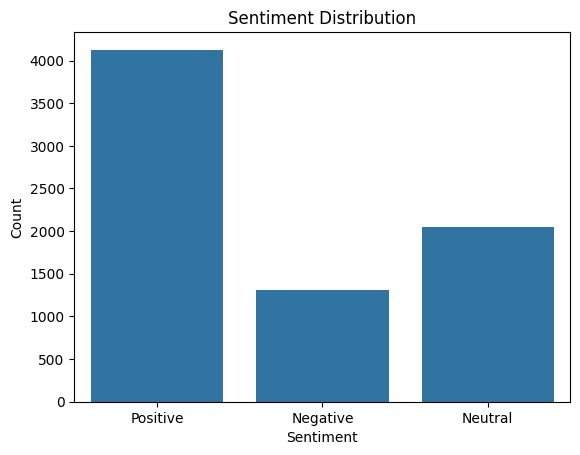

In [29]:
sns.countplot(data=df, x='sentiment')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


<Axes: title={'center': 'Sentiment Over Time'}, xlabel='date'>

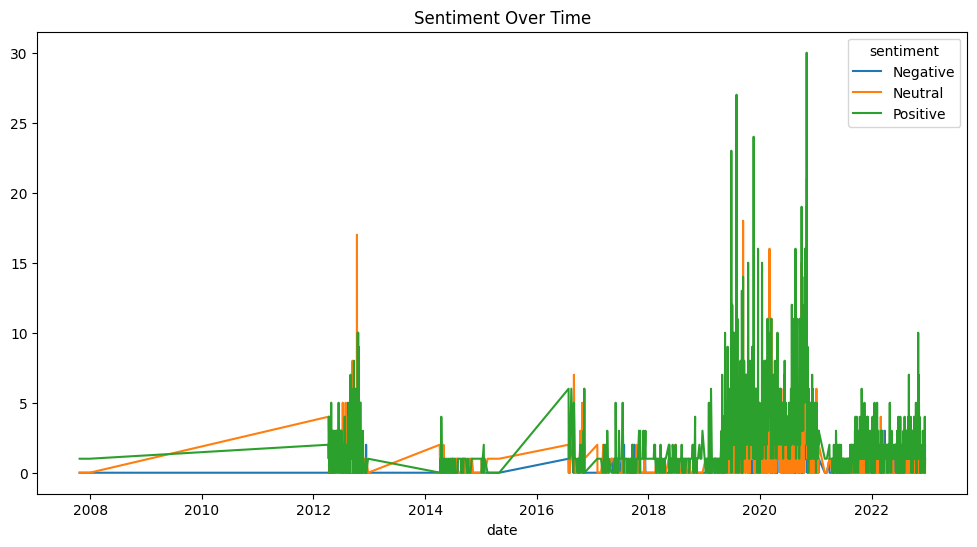

In [30]:
df['date'] = pd.to_datetime(df['date'])
sentiment_over_time = df.groupby([df['date'].dt.date, 'sentiment']).size().unstack().fillna(0)
sentiment_over_time.plot(figsize=(12,6), title='Sentiment Over Time')


<Axes: title={'center': 'Average Likes by Sentiment'}, xlabel='sentiment'>

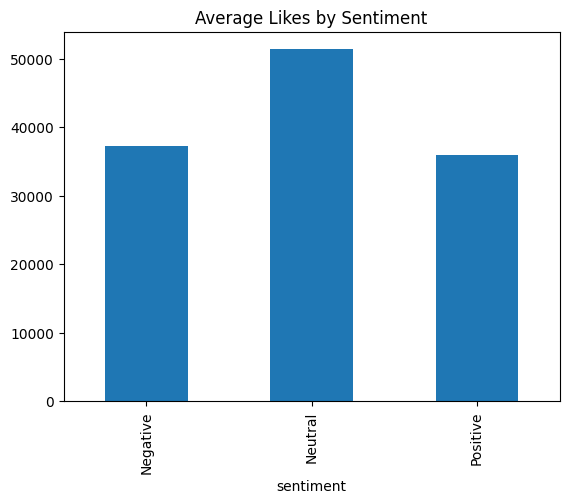

In [31]:
df.groupby('sentiment')['likeCount'].mean().plot.bar(title='Average Likes by Sentiment')


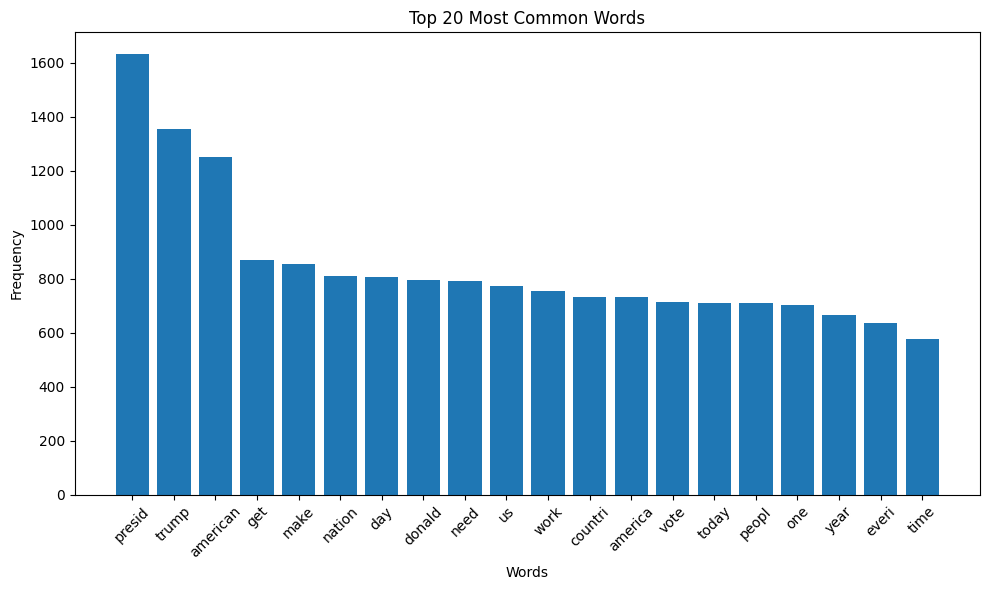

In [32]:
words, counts = zip(*common_words)
plt.figure(figsize=(10,6))
plt.bar(words, counts)
plt.title("Top 20 Most Common Words")
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [51]:
X = df['tokens'].apply(lambda x: ' '.join(x))

In [52]:

y = df['sentiment']  

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [54]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [55]:
smote = SMOTE(random_state=42)

In [56]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train_bal, y_train_bal)

RandomForestClassifier(random_state=42)

In [57]:
y_pred_rf = model_rf.predict(X_test_vec)

In [59]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.7975951903807615
              precision    recall  f1-score   support

    Negative       0.77      0.51      0.61       259
     Neutral       0.71      0.81      0.76       397
    Positive       0.85      0.88      0.86       841

    accuracy                           0.80      1497
   macro avg       0.78      0.73      0.74      1497
weighted avg       0.80      0.80      0.79      1497

